# Classifying Emails into Newsgroups:

## Data Description:

In this project, we have a collection of approximately 20,000 emails sent to 20 newsgroups. Our job is to classify them into correct newsgroups. These newsgroups with their corresponding target values are:

    0 - alt.atheism,
    1 - comp.graphics,
    2 - comp.os.ms-windows.misc,
    3 - comp.sys.ibm.pc.hardware,
    4 - comp.sys.mac.hardware,
    5 - comp.windows.x,
    6 - misc.forsale,
    7 - rec.autos,
    8 - rec.motorcycles,
    9 - rec.sport.baseball,
    10 - rec.sport.hockey,
    11 - sci.crypt,
    12 - sci.electronics,
    13 - sci.med,
    14 - sci.space,
    15 - soc.religion.christian,
    16 - talk.politics.guns,
    17 - talk.politics.mideast,
    18 - talk.politics.misc,
    19 - talk.religion.misc


The data is given in training and testing sets. We formed a new dataset combining both, did some exploration and preprocessing on this set, applied bag of words model then finally split it into train and test datasets.

We applied several machine learning models and presented their results.

## Loading the Data:

In [1]:
#Load necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [34]:
#Loading the data:
categories = [
    'alt.atheism',
    'comp.graphics',
    'comp.os.ms-windows.misc',
    'comp.sys.ibm.pc.hardware',
    'comp.sys.mac.hardware',
    'comp.windows.x',
    'misc.forsale',
    'rec.autos',
    'rec.motorcycles',
    'rec.sport.baseball',
    'rec.sport.hockey',
    'sci.crypt',
    'sci.electronics',
    'sci.med',
    'sci.space',
    'soc.religion.christian',
    'talk.politics.guns',
    'talk.politics.mideast',
    'talk.politics.misc',
    'talk.religion.misc'
]
#Extracting train data and saving it into "data" list
import os
data = []
for i in categories:
    file_numbers = os.listdir('20news-bydate-train/'+i)
    for j in range(len(file_numbers)):
        with open('20news-bydate-train/'+i+'/'+file_numbers[j]) as f:
            data.append((i, f.read()))

#Extracting test data and saving it into "data" list
for i in categories:
    file_numbers = os.listdir('20news-bydate-test/'+i)
    for j in range(len(file_numbers)):
        with open('20news-bydate-test/'+i+'/'+file_numbers[j]) as f:
            data.append((i, f.read()))
print(len(data))

11314
18846


In [38]:
#Convert "data" list to DataFrame
data = pd.DataFrame(data, columns=['target', 'email'])
data.head()

,target,email
0,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: A...
1,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: A...
2,alt.atheism,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...
3,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: R...
4,alt.atheism,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...


## Cleaning the Data:

In [39]:
#Take a look at the contents of an email
data['email'][2]

'From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau)\nSubject: Re: Gospel Dating\nOrganization: Technical University Braunschweig, Germany\nLines: 93\n\nIn article <65974@mimsy.umd.edu>\nmangoe@cs.umd.edu (Charley Wingate) writes:\n \n>>Well, John has a quite different, not necessarily more elaborated theology.\n>>There is some evidence that he must have known Luke, and that the content\n>>of Q was known to him, but not in a \'canonized\' form.\n>\n>This is a new argument to me.  Could you elaborate a little?\n>\n \nThe argument goes as follows: Q-oid quotes appear in John, but not in\nthe almost codified way they were in Matthew or Luke. However, they are\nconsidered to be similar enough to point to knowledge of Q as such, and\nnot an entirely different source.\n \n \n>>Assuming that he knew Luke would obviously put him after Luke, and would\n>>give evidence for the latter assumption.\n>\n>I don\'t think this follows.  If you take the most traditional attributions,\n>then Luke might 

To remove all html tags from the emails, we will use preprocessor function.

In [40]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

data['email'] = data['email'].apply(preprocessor)
data['email'][2]

'from i3150101 dbstu1 rz tu bs de benedikt rosenau subject re gospel dating organization technical university braunschweig germany lines 93 in article mangoe cs umd edu charley wingate writes well john has a quite different not necessarily more elaborated theology there is some evidence that he must have known luke and that the content of q was known to him but not in a canonized form this is a new argument to me could you elaborate a little the argument goes as follows q oid quotes appear in john but not in the almost codified way they were in matthew or luke however they are considered to be similar enough to point to knowledge of q as such and not an entirely different source assuming that he knew luke would obviously put him after luke and would give evidence for the latter assumption i don t think this follows if you take the most traditional attributions then luke might have known john but john is an elder figure in either case we re talking spans of time here which are well with

In [41]:
#Let's convert categorical target values into numerical values from 0 to 19
class_le = LabelEncoder()
data['target'] = class_le.fit_transform(data['target'].values)
data.head()

,target,email
0,0,from mathew subject alt atheism faq atheist re...
1,0,from mathew subject alt atheism faq introducti...
2,0,from i3150101 dbstu1 rz tu bs de benedikt rose...
3,0,from mathew subject re university violating se...
4,0,from strom watson ibm com rob strom subject re...


In [42]:
#Randomize indices
data = data.reindex(np.random.permutation(data.index))

data.head()

,target,email
7102,12,from heuvel neptune iex com ted van den heuvel...
17360,15,from sun075 gerry palo uunet uu net gerry palo...
16724,13,from collopy leland stanford edu paul dennis c...
3588,6,from harrij rebecca its rpi edu jonathan conra...
18410,18,from hallam dscomsa desy de phill hallam baker...


## Exploratory Data Analysis:

### Are There Any Missing Data?

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18846 entries, 7102 to 7768
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  18846 non-null  int32 
 1   email   18846 non-null  object
dtypes: int32(1), object(1)
memory usage: 368.1+ KB


We do not have missing data.

### Are There Any Duplicates in the Data?

In [9]:
data.groupby('target').describe()

email                                                               
       count unique                                                top freq
target                                                                     
0        799    799  from acooper mac cc macalstr edu turin turamba...    1
1        973    973  from dingebre imp sim es com david ingebretsen...    1
2        985    985  from christian robert etudiants unine ch subje...    1
3        982    982  from rkimball athena qualcomm com robert kimba...    1
4        963    963  organization queen s university at kingston fr...    1
5        988    988  from mvalente draco lnec pt subject x on dos o...    1
6        975    973  from jllee acsu buffalo edu johnny l lee subje...    2
7        990    990  from reilly admail fnal gov rob reilly subject...    1
8        996    996  from csundh30 ursa calvin edu charles sundheim...    1
9        994    994  from snichols adobe com sherri nichols subject...    1
10       999    999  from bart splunge uucp barton oleksy subject r...    1
11       991    991  subject re once tapped your code is no good an...    1
12       984    984  from wtm uhura neoucom edu bill mayhew subject...    1
13       990    990  from tung paaiec enet dec com subject re opini...    1
14       987    987  from mrf4276 egbsun12 nosubdomain nodomain mat...    1
15       997    997  from dps nasa kodak com dan schaertel subject ...    1
16       910    910  from minh lang subject re gov t break ins re 6...    1
17       940    940  from ayr1 cunixa cc columbia edu amir y rosenb...    1
18       775    775  from helfman aero org robert s helfman subject...    1
19       628    628  from bevan cs man ac uk stephen j bevan subjec...    1

We see that in group 6 we have duplicates, let's drop them from the dataset.

In [10]:
data.drop_duplicates(inplace=True)
data.groupby('target').describe()

email                                                               
       count unique                                                top freq
target                                                                     
0        799    799  from acooper mac cc macalstr edu turin turamba...    1
1        973    973  from dingebre imp sim es com david ingebretsen...    1
2        985    985  from christian robert etudiants unine ch subje...    1
3        982    982  from rkimball athena qualcomm com robert kimba...    1
4        963    963  organization queen s university at kingston fr...    1
5        988    988  from mvalente draco lnec pt subject x on dos o...    1
6        973    973  subject help how to get refund from visual ima...    1
7        990    990  from reilly admail fnal gov rob reilly subject...    1
8        996    996  from csundh30 ursa calvin edu charles sundheim...    1
9        994    994  from snichols adobe com sherri nichols subject...    1
10       999    999  from bart splunge uucp barton oleksy subject r...    1
11       991    991  subject re once tapped your code is no good an...    1
12       984    984  from wtm uhura neoucom edu bill mayhew subject...    1
13       990    990  from tung paaiec enet dec com subject re opini...    1
14       987    987  from mrf4276 egbsun12 nosubdomain nodomain mat...    1
15       997    997  from dps nasa kodak com dan schaertel subject ...    1
16       910    910  from minh lang subject re gov t break ins re 6...    1
17       940    940  from ayr1 cunixa cc columbia edu amir y rosenb...    1
18       775    775  from helfman aero org robert s helfman subject...    1
19       628    628  from bevan cs man ac uk stephen j bevan subjec...    1

### How Long are the Emails:

In [45]:
data['length'] = data['email'].map(lambda text: len(text))
data.head()
data['length'].min()

107

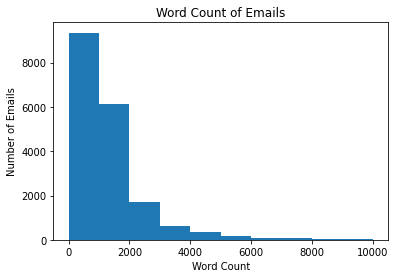

In [12]:
plt.hist(data['length'], bins = [0,1000, 2000,3000,4000,5000,6000,7000,8000,9000,10000])
plt.title("Word Count of Emails") 
plt.xlabel('Word Count')
plt.ylabel('Number of Emails')
plt.show()

In [13]:
data.length.describe()

count    18844.000000
mean      1633.540437
std       3082.500584
min        107.000000
25%        646.750000
50%       1006.000000
75%       1640.000000
max      67560.000000
Name: length, dtype: float64

We observe that the most frequent word count is 1000 or less. Very few of the emails contain more than 4000 words. On average, there are 1634 words in emails, and somebody took the time to write an email containing 67560 words!

### Is There Any Difference in Email Length Between Newsgroups?

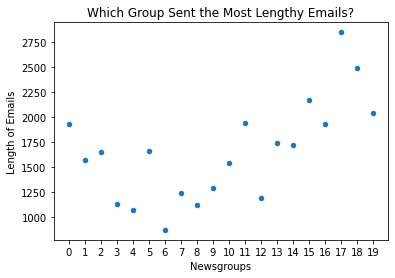

In [14]:
length_per_newsgroup = pd.DataFrame(data.groupby('target')['length'].mean(), columns=[ 'length'])
l_per_news = length_per_newsgroup.reset_index()
l_per_news.plot(x='target', y='length',kind='scatter')
ticks=list(l_per_news['target'])
plt.xticks(ticks)
plt.xlabel('Newsgroups')
plt.ylabel('Length of Emails')
plt.title('Which Group Sent the Most Lengthy Emails?')
plt.show()

On average, Group 17, which corresponds to 'talk.politics.mideast' sent the most lengthy emails. 'talk.politics.misc' and 'talk.religion.misc' are the second and third runner-ups respectively. This is not surprising, as the politics and religion are two topics people are generally very passionate to talk about.

## Applying Bag of Words:

In this section, we will convert emails into vectors containing numbers. We will use bag of words approach, where each unique word in a text will be represented by one number.

In [15]:
#Load necessary libraries:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\h\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\h\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\h\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\h\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

We will tokenize words in text, remove stop words (commonly used English words that do not contribute in decision making) and normalize words into their base forms (lemmas) with the following code: 

In [16]:
stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

def tokenize_lemmas(email):
    email = str(email).lower()
    words = TextBlob(email).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

Now, we will convert each document into a vector that machine learning models can understand. In vectorization process, first we count how many times a word occurs in each document, then weight the counts, so that frequent tokens get lower weight. Finally, normalize the vectors to unit length. Each vector has as many dimensions as there are unique words in the document:

In [17]:
%%time
bow_transformer = CountVectorizer(analyzer=tokenize_lemmas).fit(data['email'])

print(len(bow_transformer.vocabulary_))

130656
Wall time: 1min 27s


In [18]:
%%time
data_bow = bow_transformer.transform(data['email'])
print('sparse matrix shape:', data_bow.shape)
print('number of non-zeros:', data_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * data_bow.nnz / (data_bow.shape[0] * data_bow.shape[1])))

sparse matrix shape: (18844, 130656)
number of non-zeros: 2188592
sparsity: 0.09%
Wall time: 1min 25s


In [47]:
data_bow[0].data

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1,
       2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 8, 2, 1, 1, 1, 1,
       1], dtype=int64)

Now that the data is ready, we can split it into training and testing sets. First 12,000 documents will be in the training set. 6,834 of the remaining 6,844, will be in the testing set and the last 10 will be held to test our models to see how they will perform:

## Splitting the Data into Training, Testing and Trial:

In [20]:
bow_train = data_bow[:12000]
bow_test = data_bow[12000:18834]
sentiment_train = data['target'][:12000]
sentiment_test = data['target'][12000:18834]
#The following will be never seen by the models. We will predict the results using our models
trial = data_bow[18834:]
sentiment = data['target'][18834:]
print('Train features shape:', bow_train.shape)
print('Train target shape:', sentiment_train.shape)
print('Test features shape:', bow_test.shape)
print('Test target shape:', sentiment_test.shape)
print('Trial features shape:', trial.shape)
print('Trial target shape:', sentiment.shape)


Train features shape: (12000, 130656)
Train target shape: (12000,)
Test features shape: (6834, 130656)
Test target shape: (6834,)
Trial features shape: (10, 130656)
Trial target shape: (10,)


## Classification Algorithms:

The following function will display accuracy for training and testing, classification report and confusion matrix after a model is applied. 

In [21]:
def acc_conf_mat(train, test, pred_train,pred_test):
    train_score = accuracy_score(train, pred_train) * 100
    print(f"Train accuracy score: {train_score:.2f}%")
    test_score = accuracy_score(test, pred_test) * 100
    print(f"Test accuracy score: {test_score:.2f}%")
    print(classification_report(test, pred_test))
    cm = confusion_matrix(test, pred_test)
    cmd = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots(figsize=(10,10))
    cmd.plot(ax=ax)

### Applying Multinomial Naive Bayes Algorithm:

In [22]:
#import Multinomial Naive Bayes Classification
from sklearn.naive_bayes import MultinomialNB

mnb= MultinomialNB().fit(bow_train, sentiment_train)

Train accuracy score: 96.13%
Test accuracy score: 86.85%
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       273
           1       0.72      0.87      0.79       370
           2       0.96      0.45      0.61       375
           3       0.71      0.82      0.76       373
           4       0.86      0.85      0.85       354
           5       0.74      0.92      0.82       341
           6       0.88      0.78      0.82       339
           7       0.91      0.89      0.90       384
           8       0.97      0.95      0.96       386
           9       0.96      0.93      0.95       341
          10       0.93      0.97      0.95       330
          11       0.86      0.97      0.91       351
          12       0.88      0.81      0.85       360
          13       0.97      0.95      0.96       367
          14       0.90      0.95      0.93       367
          15       0.85      0.97      0.90       342
          16       0.84 

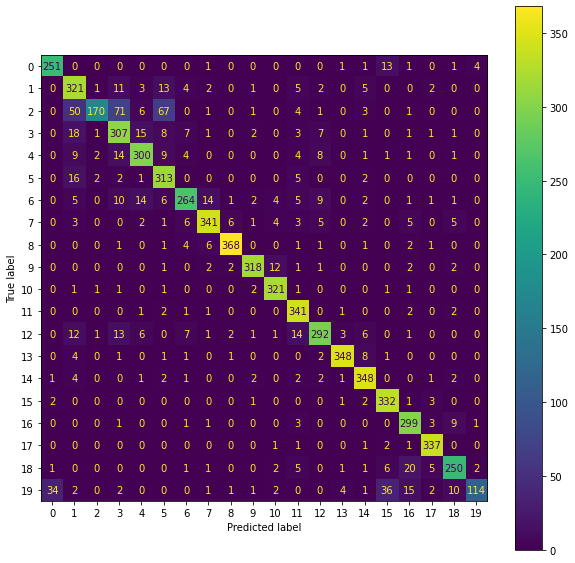

In [23]:
pred_train = mnb.predict(bow_train)
pred_test = mnb.predict(bow_test)
acc_conf_mat(sentiment_train, sentiment_test, pred_train, pred_test)

In [24]:
pred = mnb.predict(trial)
print("Actual values for the unseen data are: ", list(sentiment))
print("Predicted values for the unseen data are: ", pred)

Actual values for the unseen data are:  [0, 10, 6, 3, 3, 11, 8, 11, 10, 17]
Predicted values for the unseen data are:  [ 0 10  6  6  3 11  8 11  9 17]


### Applying Logistic Regression:

In [25]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(bow_train, sentiment_train)
train_pred = lr.predict(bow_train)
test_pred = lr.predict(bow_test)

C:\Users\h\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train accuracy score: 100.00%
Test accuracy score: 88.57%
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       273
           1       0.80      0.82      0.81       370
           2       0.87      0.85      0.86       375
           3       0.77      0.77      0.77       373
           4       0.84      0.83      0.83       354
           5       0.86      0.86      0.86       341
           6       0.79      0.86      0.82       339
           7       0.88      0.91      0.90       384
           8       0.95      0.92      0.94       386
           9       0.94      0.96      0.95       341
          10       0.97      0.95      0.96       330
          11       0.95      0.93      0.94       351
          12       0.82      0.85      0.83       360
          13       0.90      0.93      0.92       367
          14       0.94      0.93      0.94       367
          15       0.93      0.95      0.94       342
          16       0.92

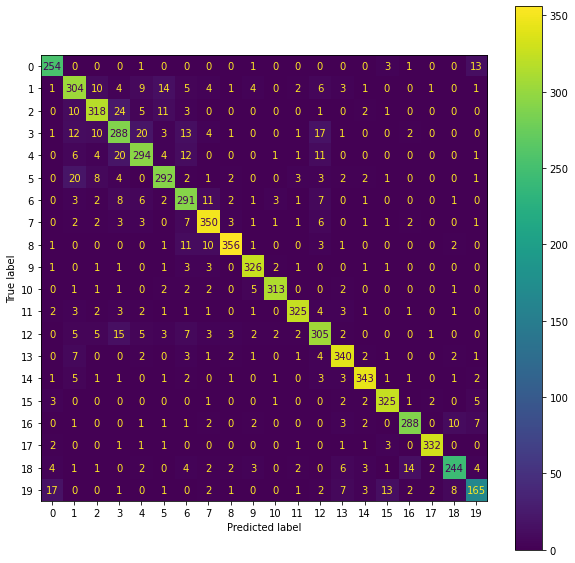

In [26]:
acc_conf_mat(sentiment_train, sentiment_test, train_pred, test_pred)

In [27]:
pred =lr.predict(trial)
print("Actual values for the unseen data are: ", list(sentiment))
print("Predicted values for the unseen data are: ", pred)

Actual values for the unseen data are:  [0, 10, 6, 3, 3, 11, 8, 11, 10, 17]
Predicted values for the unseen data are:  [ 0 10  6  3  5 11  8 11  9 17]


### Applying Support Vector Classification:

Train accuracy score: 99.76%
Test accuracy score: 86.27%
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       273
           1       0.73      0.80      0.76       370
           2       0.84      0.79      0.82       375
           3       0.74      0.75      0.74       373
           4       0.82      0.79      0.80       354
           5       0.83      0.83      0.83       341
           6       0.77      0.87      0.82       339
           7       0.87      0.88      0.87       384
           8       0.96      0.90      0.93       386
           9       0.88      0.94      0.91       341
          10       0.96      0.92      0.94       330
          11       0.95      0.90      0.92       351
          12       0.77      0.81      0.79       360
          13       0.86      0.90      0.88       367
          14       0.94      0.91      0.93       367
          15       0.91      0.92      0.91       342
          16       0.93 

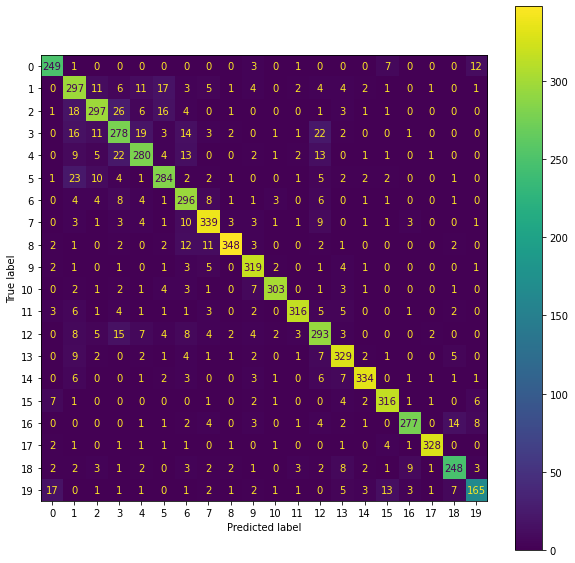

In [28]:
from sklearn.svm import SVC


svm = SVC(kernel='linear', C=0.025,random_state=101)
svm.fit(bow_train, sentiment_train)
train_pred = svm.predict(bow_train)
test_pred = svm.predict(bow_test)
acc_conf_mat(sentiment_train, sentiment_test, train_pred, test_pred)

In [29]:
pred = svm.predict(trial)
print("Actual values for the unseen data are: ", list(sentiment))
print("Predicted values for the unseen data are: ", pred)

Actual values for the unseen data are:  [0, 10, 6, 3, 3, 11, 8, 11, 10, 17]
Predicted values for the unseen data are:  [ 0 10  6  3 12 11  8 11  9 17]


### Applying Stochastic Gradient Descent:

Train accuracy score: 99.78%
Test accuracy score: 81.34%
              precision    recall  f1-score   support

           0       0.61      0.83      0.70       273
           1       0.75      0.70      0.72       370
           2       0.79      0.77      0.78       375
           3       0.74      0.68      0.71       373
           4       0.82      0.75      0.78       354
           5       0.76      0.78      0.77       341
           6       0.81      0.74      0.77       339
           7       0.86      0.85      0.86       384
           8       0.90      0.88      0.89       386
           9       0.85      0.89      0.87       341
          10       0.94      0.88      0.91       330
          11       0.85      0.89      0.87       351
          12       0.72      0.81      0.76       360
          13       0.87      0.83      0.85       367
          14       0.93      0.89      0.91       367
          15       0.89      0.89      0.89       342
          16       0.66 

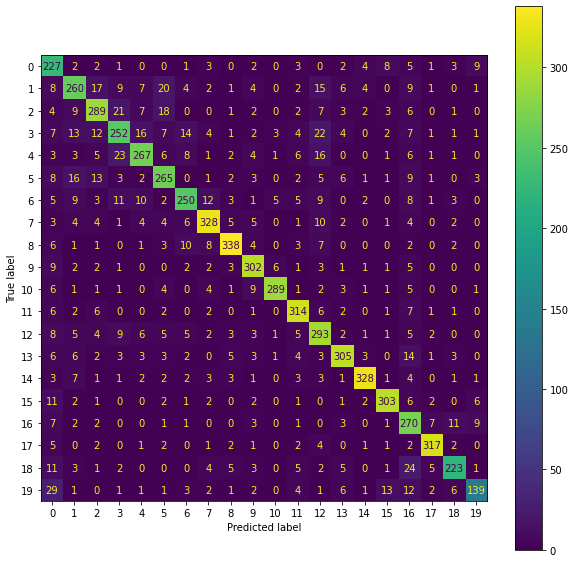

In [30]:
from sklearn.linear_model import SGDClassifier
sgd =SGDClassifier(loss='modified_huber',shuffle=True, random_state=101)
sgd.fit(bow_train, sentiment_train)
train_pred = sgd.predict(bow_train)
test_pred = sgd.predict(bow_test)
acc_conf_mat(sentiment_train, sentiment_test, train_pred, test_pred)

In [31]:
pred = sgd.predict(trial)
print("Actual values for the unseen data are: ", list(sentiment))
print("Predicted values for the unseen data are: ", pred)

Actual values for the unseen data are:  [0, 10, 6, 3, 3, 11, 8, 11, 10, 17]
Predicted values for the unseen data are:  [ 0 10  6 17  5 11  8 11  9 17]


### Applying K-Neighbors:

Train accuracy score: 100.00%
Test accuracy score: 60.52%
              precision    recall  f1-score   support

           0       0.30      0.74      0.43       273
           1       0.27      0.60      0.37       370
           2       0.68      0.57      0.62       375
           3       0.63      0.45      0.53       373
           4       0.40      0.52      0.45       354
           5       0.78      0.50      0.61       341
           6       0.48      0.43      0.45       339
           7       0.71      0.57      0.63       384
           8       0.85      0.64      0.73       386
           9       0.67      0.67      0.67       341
          10       0.77      0.69      0.73       330
          11       0.88      0.67      0.76       351
          12       0.72      0.56      0.63       360
          13       0.57      0.63      0.59       367
          14       0.88      0.69      0.77       367
          15       0.77      0.59      0.67       342
          16       0.78

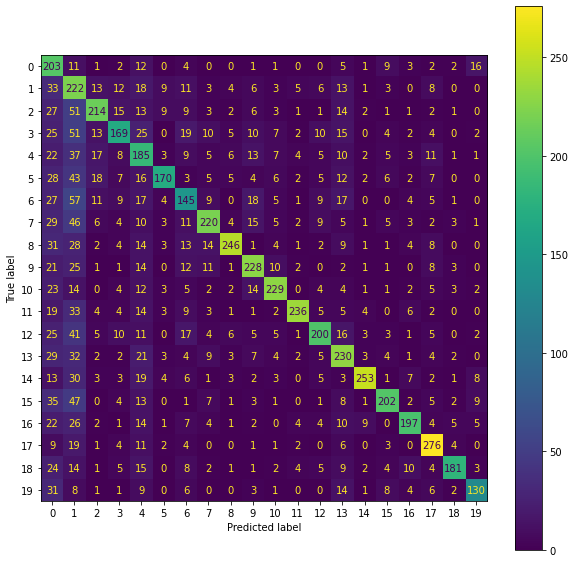

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(bow_train, sentiment_train)
train_pred = knn.predict(bow_train)
test_pred = knn.predict(bow_test)
acc_conf_mat(sentiment_train, sentiment_test, train_pred, test_pred)

In [33]:
pred = knn.predict(trial)
print("Actual values for the unseen data are: ", list(sentiment))
print("Predicted values for the unseen data are: ", pred)

Actual values for the unseen data are:  [0, 10, 6, 3, 3, 11, 8, 11, 10, 17]
Predicted values for the unseen data are:  [ 0  0  6  6  0 11  7 11  9 17]


## Conclusion:

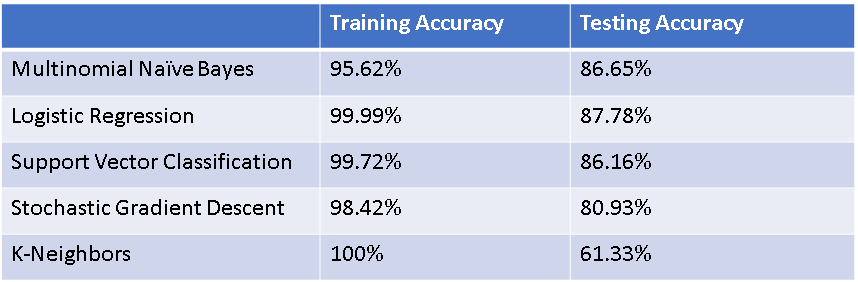

It seems Logistic Regression is the best performing algorithm with almost 88% and 100% accuracy with testing and training sets respectively. Second best would be Support Vector Classification, followed by Multinomial Naive Bayes. The worst performing was K-Neighbors. It's probably due to the curse of dimensionality. K-Neighbors performs best with fewer number of features. If the number of features is high, it requires more data. When there is more data, it is prone to overfitting, which is exactly what we see here with 100% training accuracy and only 61.33% testing accuracy. This is due to the fact that we have 130,656 features which is enormous. 